# Data Cleaning with Pandas
## Missing Values
### Data Quality Dimensions
1. Accuracy
1. Completeness
1. Uniqueness
1. Timeliness
1. Validity
1. Consistency
### Missing Values
What is the problem with missing data?
How do we deal with missing it?
There are three main options:
1) Removal.
2) Imputation – requires skill.
3) Leave as is; some models can deal with missing values.

# Representing Missing Values
Pandas represents all missing values as NaN.
- None will be converted to NAN.

## Brief exploration of isna(), value_counts() and sum 

### Pandas `isna()`, `sum()`, and `value_counts()` Example

This example demonstrates how to use the `isna()`, `sum()`, and `value_counts()` functions in pandas to analyze missing values in a DataFrame.

#### Create a Sample DataFrame

```python
import pandas as pd

# Create a sample DataFrame
data = {
    'A': [1, 2, None, 4],
    'B': [None, 2, 3, 4],
    'C': [1, None, None, 4]
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)
```

Output:
```
   A    B    C
0  1.0  NaN  1.0
1  2.0  2.0  NaN
2  NaN  3.0  NaN
3  4.0  4.0  4.0
```

#### Detect Missing Values with `isna()`

```python
# Use isna() to detect missing values
missing_values = df.isna()
print("\nMissing Values (isna):")
print(missing_values)
```

Output:
```
       A      B      C
0  False   True  False
1  False  False   True
2   True  False   True
3  False  False  False
```

#### Count Missing Values with `sum()`

```python
# Sum up the number of missing values in each column
missing_count = df.isna().sum()
print("\nCount of Missing Values (sum):")
print(missing_count)
```

Output:
```
A    1
B    1
C    2
dtype: int64
```

#### Count Occurrences of Missing and Non-Missing Values with `value_counts()`

```python
# Use value_counts() to count occurrences of True (missing) and False (non-missing) values in each column
missing_value_counts = df.isna().apply(pd.value_counts).fillna(0).astype(int)
print("\nValue Counts of Missing (True) and Non-Missing (False) Values:")
print(missing_value_counts)
```

Output:
```
       A  B  C
False  3  3  2
True   1  1  2
```

### Summary

- **Original DataFrame**: Displays the initial data with some missing values (`NaN`).
- **Missing Values (isna)**: Shows a DataFrame indicating where missing values are located (`True` for missing, `False` for non-missing).
- **Count of Missing Values (sum)**: Provides a count of missing values in each column.
- **Value Counts of Missing (True) and Non-Missing (False) Values**: Gives a detailed count of missing (`True`) and non-missing (`False`) values for each column.

This integrated example provides a comprehensive overview of how to use `isna()`, `sum()`, and `value_counts()` to analyze missing data in a pandas DataFrame.

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame({
    'participant':[1,2,3,4],
    'age': [50,None, 30, np.NaN],
    'satisfaction': [None, 8, 9, None]
})

df

,participant,age,satisfaction
0,1,50.0,NaN
1,2,NaN,8.0
2,3,30.0,9.0
3,4,NaN,NaN


### Finding missing Values

In [3]:
df.isna().any()

participant     False
age              True
satisfaction     True
dtype: bool

In [5]:
df[df.isna().any(axis=1)]

,participant,age,satisfaction
0,1,50.0,NaN
1,2,NaN,8.0
3,4,NaN,NaN


### The named argument 'axis'
In Pandas, the named argument 'axis' determines the direction along which an operation is applied. Specifically:

- **axis=0**: Indicates that the operation is performed along the rows (vertically). When `axis=0`, operations are applied vertically across the rows, such as calculating the mean, sum, or any aggregation function for each column.

- **axis=1**: Indicates that the operation is performed along the columns (horizontally). When `axis=1`, operations are applied horizontally across the columns, such as calculating the mean, sum, or any aggregation function for each row.

In the given example: `df[df.isna().any(axis=1)]`

- `df.isna().any(axis=1)`: This expression checks for missing values (NaN) in each row (`axis=1`). It returns a boolean Series indicating whether any missing value exists in each row of the DataFrame `df`.

- `df[df.isna().any(axis=1)]`: This expression filters the rows of the DataFrame `df` based on the boolean Series obtained from `df.isna().any(axis=1)`. It selects only those rows where at least one missing value exists.

In summary, `axis=1` specifies that the operation of checking for missing values is applied along the columns (horizontally) to determine whether any missing value exists in each row of the DataFrame.

# Counting Missing Values

In [22]:
df.isna().sum()

participant    0
age            2
satisfacion    2
dtype: int64

The expression `df.isna().sum()` is used to count the number of missing values (NaN or None) in each column of the DataFrame `df`. Here's how it works:

1. `df.isna()`: This method returns a DataFrame of the same shape as `df`, where each element is `True` if the corresponding element in `df` is missing (NaN or None), and `False` otherwise.

2. `.sum()`: This method is then applied to the DataFrame obtained from `df.isna()`. When used without specifying the `axis` parameter, it computes the sum of each column (axis=0 by default), counting the number of `True` values (missing values) in each column.

Putting it all together:

- `df.isna().sum()`: This expression first checks for missing values in each element of the DataFrame `df` (`df.isna()`). Then, it sums the `True` values (missing values) along each column to count the total number of missing values in each column.

The output of `df.isna().sum()` will be a Series where each index represents a column name, and the corresponding value represents the count of missing values in that column. For example, if there are 2 missing values in the 'age' column and 2 missing values in the 'satisfaction' column, the output would be something like:

```
participant    0
age            2
satisfaction   2
dtype: int64
```

This indicates that there are 0 missing values in the 'participant' column, 2 missing values in the 'age' column, and 2 missing values in the 'satisfaction' column.

In [25]:
df[~df.isna().any(axis=1)]

,participant,age,satisfacion
2,3,30.0,9.0


### Let's break down the code `df[~df.isna().any(axis=1)]`:

1. `df.isna()`: This expression returns a DataFrame of the same shape as `df`, where each element is `True` if the corresponding element in `df` is missing (NaN or None), and `False` otherwise.

2. `.any(axis=1)`: This method is applied to the DataFrame obtained from `df.isna()`. When `axis=1` is specified, it checks if any missing value exists in each row. It returns a boolean Series where each value is `True` if at least one missing value exists in the corresponding row, and `False` otherwise.

3. `~`: The tilde (`~`) operator is a logical NOT operator in Python. When applied to a boolean Series, it negates (flips) the values. So, `~df.isna().any(axis=1)` will return a boolean Series where each value is `True` if there are no missing values in the corresponding row, and `False` if there is at least one missing value.

4. `df[~df.isna().any(axis=1)]`: Finally, this expression filters the rows of the DataFrame `df` based on the boolean Series obtained from `~df.isna().any(axis=1)`. It selects only those rows where there are no missing values (i.e., all values in the row are present).

### In summary
`df[~df.isna().any(axis=1)]` selects rows from the DataFrame `df` where there are no missing values in any column. It's a way to filter out rows with missing values, effectively cleansing the data of incomplete records.

# Deleting Missing Values
Let's break down the `dropna()` method with different parameters:

1. **Without Arguments:**
   - When `dropna()` is called without any arguments, it removes all rows containing any missing values (NaN or None) across all columns. In other words, it drops any row where at least one value is missing.

2. **Using `thresh=2`:**
   - When `dropna(thresh=2)` is used, it specifies that a row should only be removed if it contains less than 2 non-missing values. 
   - For example, if a row has 2 or more non-missing values, it will be retained, but if it has only 1 or fewer non-missing values, it will be dropped.

3. **Using `subset=['age','satisfaction']`:**
   - When `dropna(subset=['age','satisfaction'])` is used, it specifies that only the specified subset of columns should be considered when dropping rows.
   - In this case, only the 'age' and 'satisfaction' columns are considered. If a row has missing values in any other column (other than 'age' and 'satisfaction'), it will not be dropped.

4. **Using `how='all'`:**
   - When `dropna(how='all')` is used, it specifies that a row should only be removed if all values in the row are missing (NaN or None). 
   - In other words, if a row has at least one non-missing value, it will be retained, even if other values are missing.

Putting it all together, here's how each parameter affects the behavior of `dropna()`:

- Without arguments: Removes rows with any missing values in any column.
- Using `thresh=2`: Removes rows with fewer than 2 non-missing values.
- Using `subset=['age','satisfaction']`: Considers only the 'age' and 'satisfaction' columns when dropping rows.
- Using `how='all'`: Removes rows where all values are missing.

In [31]:
df.dropna()

,participant,age,satisfacion
2,3,30.0,9.0


In [33]:
df.dropna(thresh=2)

,participant,age,satisfacion
0,1,50.0,NaN
1,2,NaN,8.0
2,3,30.0,9.0


In [42]:
df.dropna(subset=['age','satisfaction'], how='all')

,participant,age,satisfaction
0,1,50.0,NaN
1,2,NaN,8.0
2,3,30.0,9.0


### Filling in Missing Values
- If filling in values, it is common to use an average.
- Use fillna to specify a value (depending on the column) to replace each NaN with.

Let's break down the code 
```python
df.fillna({
    'age': df['age'].mean(), 
    'satisfaction': df['satisfaction'].mode()[0]
})`
```

1. **`df['age'].mean()`**:
   - This calculates the mean (average) value of the 'age' column in the DataFrame `df`.
   - If there are missing values (NaN) in the 'age' column, they will be excluded from the calculation.
   - The result is a single value representing the mean age of the participants.

2. **`df['satisfaction'].mode()[0]`**:
   - This calculates the mode (most frequent value) of the 'satisfaction' column in the DataFrame `df`.
   - If there are multiple modes, it returns the first mode.
   - The result is a single value representing the mode of satisfaction levels among the participants.

3. **`{'age': df['age'].mean(), 'satisfaction': df['satisfaction'].mode()[0]}`**:
   - This creates a dictionary where the keys are the column names ('age' and 'satisfaction'), and the values are the calculated mean age and mode satisfaction level, respectively.
   - For example, if the mean age is 30 and the mode satisfaction level is 8, the dictionary would be `{'age': 30, 'satisfaction': 8}`.

4. **`df.fillna(...)`**:
   - This fills missing values (NaN) in the DataFrame `df` with the specified values from the dictionary.
   - If a missing value is encountered in the 'age' column, it will be replaced with the mean age (30 in the example).
   - If a missing value is encountered in the 'satisfaction' column, it will be replaced with the mode satisfaction level (8 in the example).

In summary, `df.fillna({'age': df['age'].mean(), 'satisfaction': df['satisfaction'].mode()[0]})` fills missing values in the 'age' column with the mean age and missing values in the 'satisfaction' column with the mode satisfaction level. This helps to impute missing values in a DataFrame based on summary statistics like mean and mode, making the dataset more complete and suitable for analysis.

### Further discusion on fillna WRT ```'age': df['age'].mean()```

When you call `df['age'].mean()`, it calculates the mean (average) value of the 'age' column in the DataFrame `df`. If there are missing values (NaN) in the 'age' column, those missing values are automatically excluded from the calculation.

So, in the context of the `fillna()` method, if there are missing values in the 'age' column, those missing values will be replaced by the calculated mean of the non-missing values in the 'age' column. The NaN values will be replaced by the mean of the existing values.

For example, suppose we have the following 'age' column:

```
age
----
  20
  NaN
  30
  25
```

- The mean of the 'age' column is (20 + 30 + 25) / 3 = 25.
- Therefore, the missing value will be replaced by 25.

After applying `df.fillna({'age': df['age'].mean()})`, the 'age' column would become:

```
age
----
  20
  25
  30
  25
```

So, the NaN value has been replaced by the mean of the existing values (25). This helps to fill in missing data and make the dataset more complete for analysis.

### Further Discussion on ```df['satisfaction'].mode()[0]```

In Python, when you calculate the mode of a DataFrame column using the `mode()` method, it returns a Pandas Series containing the mode(s) of the column. If there are multiple modes, it returns all of them.

However, the `[0]` index appended to `df['satisfaction'].mode()[0]` is used to extract the first mode from the Pandas Series. This is because the `mode()` method returns a Series sorted in ascending order. Therefore, the mode with the smallest value appears at index 0.

For example, consider a DataFrame column 'satisfaction' with values [8, 8, 9, 10]. The mode of this column would be 8 because it appears more frequently than any other value. When you call `df['satisfaction'].mode()`, it returns a Series `[8]`. The `[0]` index is then used to extract the mode value, resulting in 8.

In cases where there are multiple modes with the same frequency, `[0]` will always return the mode with the smallest value due to the sorting behavior of the `mode()` method. If you want to handle cases where there are multiple modes differently, additional logic may be required.

Let's consider a simple example where the 'satisfaction' column has multiple modes:

Suppose we have the following 'satisfaction' column:

```
satisfaction
------------
     8
     8
     9
    10
    10
```

In this example, both 8 and 10 occur twice, making them modes of the column. 

When you call `df['satisfaction'].mode()`, it will return a Pandas Series containing both modes:

```
0    8
1   10
dtype: int64
```

Now, if you want to extract the first mode (8), you would use the `[0]` index like this:

```
df['satisfaction'].mode()[0]
```

This would return 8.

So, in cases where there are multiple modes, `[0]` will return the first mode from the list of modes.

### Deduplication
#### ```info()```
The `info()` method in Pandas is a convenient way to get a concise summary of the DataFrame, including information about the data types, the number of non-null values, and memory usage. Here's a breakdown of what the `info()` method provides:

1. **Index Information:**
   - It starts by displaying information about the index, including the data type and range (start and stop values) of the index, as well as the number of entries in the index.

2. **Column Information:**
   - For each column in the DataFrame, it displays the column name, the number of non-null entries, the data type of the values in the column, and memory usage.
   - If there are missing values (NaN or None) in a column, the count of non-null entries will be less than the total number of entries, indicating the presence of missing values.
   - This section provides a quick overview of the structure and composition of the DataFrame.

3. **Memory Usage:**
   - At the end of the summary, it provides an estimate of the total memory usage of the DataFrame.
   - This can be helpful for understanding the memory footprint of the DataFrame and optimizing memory usage, especially for large datasets.

Overall, the `info()` method is a useful tool for quickly inspecting the contents and structure of a DataFrame, identifying missing values, understanding data types, and gaining insights into memory usage. It's often used as a first step in exploratory data analysis to understand the characteristics of the dataset before further analysis or processing.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   participant   4 non-null      int64  
 1   age           2 non-null      float64
 2   satisfaction  2 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 228.0 bytes


#### ```duplicated()```
The `duplicated()` method in Pandas is used to identify duplicate rows in a DataFrame. It returns a boolean Series where each element indicates whether the corresponding row is a duplicate of a previous row in the DataFrame.

Here's how the `duplicated()` method works:

1. **Syntax**:
   ```python
   DataFrame.duplicated(subset=None, keep='first')
   ```

   - `subset`: Specifies the columns to consider when identifying duplicates. If `subset` is not specified, all columns are considered.
   - `keep`: Determines which duplicate occurrences (if any) to mark as `True`.
     - `'first'`: Marks all duplicates as `True` except for the first occurrence.
     - `'last'`: Marks all duplicates as `True` except for the last occurrence.
     - `False`: Marks all duplicates as `True`.

2. **Output**:
   - The output of `duplicated()` is a boolean Series with the same length as the DataFrame, where each element indicates whether the corresponding row is a duplicate.
   - `True` indicates that the row is a duplicate, while `False` indicates that it is not.

3. **Example**:
   ```python
   import pandas as pd

   data = {'A': [1, 2, 3, 1, 2],
           'B': ['x', 'y', 'z', 'x', 'x']}
   df = pd.DataFrame(data)

   df.duplicated()
   ```

   Output:
   ```
   0    False
   1    False
   2    False
   3     True
   4    False
   dtype: bool
   ```

In this example, the first three rows are not duplicates of any previous row, so their corresponding values in the output are `False`. However, rows 3 and 4 are duplicates of rows 0 and 1, respectively, so their corresponding values in the output are `True`.

You can use the `duplicated()` method in combination with other DataFrame methods like `drop_duplicates()` to identify and remove duplicate rows from the DataFrame as part of data cleaning and preprocessing tasks.

In [7]:
import pandas as pd

data = {'A': [1, 2, 3, 1, 2],
        'B': ['x', 'y', 'z', 'x', 'x']}
df = pd.DataFrame(data)

df.duplicated()

0    False
1    False
2    False
3     True
4    False
dtype: bool

In [69]:
import pandas as pd

df=pd.read_csv("data/mortgage_applicants_dups.csv")
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
874     True
875     True
876     True
877     True
878     True
Length: 879, dtype: bool

In [63]:
df.duplicated().sum()

1

### Identifying Duplicated Rows
The `duplicated()` method in Pandas is used to identify duplicate rows in a DataFrame. It returns a boolean Series where each element indicates whether the corresponding row is a duplicate of a previous row in the DataFrame.

Here's how the `duplicated()` method works:

1. **Syntax**:
   ```python
   DataFrame.duplicated(subset=None, keep='first')
   ```

   - `subset`: Specifies the columns to consider when identifying duplicates. If `subset` is not specified, all columns are considered.
   - `keep`: Determines which duplicate occurrences (if any) to mark as `True`.
     - `'first'`: Marks all duplicates as `True` except for the first occurrence.
     - `'last'`: Marks all duplicates as `True` except for the last occurrence.
     - `False`: Marks all duplicates as `True`.

2. **Output**:
   - The output of `duplicated()` is a boolean Series with the same length as the DataFrame, where each element indicates whether the corresponding row is a duplicate.
   - `True` indicates that the row is a duplicate, while `False` indicates that it is not.

3. **Example**:
   ```python
   import pandas as pd

   data = {'A': [1, 2, 3, 1, 2],
           'B': ['x', 'y', 'z', 'x', 'x']}
   df = pd.DataFrame(data)

   df.duplicated()
   ```

   Output:
   ```
   0    False
   1    False
   2    False
   3     True
   4    False
   dtype: bool
   ```

In this example, the first three rows are not duplicates of any previous row, so their corresponding values in the output are `False`. However, rows 3 and 4 are duplicates of rows 0 and 1, respectively, so their corresponding values in the output are `True`.

You can use the `duplicated()` method in combination with other DataFrame methods like `drop_duplicates()` to identify and remove duplicate rows from the DataFrame as part of data cleaning and preprocessing tasks.

In [12]:
import pandas as pd

df=pd.read_csv("data/mortgage_applicants_dups.csv")
df[df.duplicated()]

,Unnamed: 0,ID,Income,Term,Balance,Debt,Score,Default
856,0,567,17626,10 Years,1381,293,228.0,False
857,1,523,18959,20 Years,883,1012,187.0,False
858,2,544,20560,10 Years,684,898,86.0,False
859,3,370,21894,10 Years,748,85,NaN,False
860,4,756,24430,10 Years,1224,59,504.0,False
861,5,929,22995,20 Years,1678,1329,384.0,False
862,6,373,21124,10 Years,1135,115,560.0,False
863,7,818,24644,10 Years,1634,105,309.0,False
864,8,284,27138,20 Years,840,1877,251.0,False
865,9,621,24521,10 Years,1271,110,736.0,True


### Removing Duplicates


In [78]:
df.drop_duplicates()

,Unnamed: 0,ID,Income,Term,Balance,Debt,Score,Default
0,0,567,17626,10 Years,1381,293,228.0,False
1,1,523,18959,20 Years,883,1012,187.0,False
2,2,544,20560,10 Years,684,898,86.0,False
3,3,370,21894,10 Years,748,85,NaN,False
4,4,756,24430,10 Years,1224,59,504.0,False
...,...,...,...,...,...,...,...,...
851,851,71,30191,20 Years,1319,3880,55.0,True
852,852,932,41669,20 Years,1385,32,780.0,False
853,853,39,36816,20 Years,1868,3123,366.0,True
854,854,283,42145,20 Years,1447,2498,422.0,False


## DataTransformation
We often want to change how we represent data.
This could involve:
- replacing some values with others.
- binning continuous variables.
- deriving new columns.
- applying functions.

In [82]:
import pandas as pd

df=pd.read_csv("data/mortgage_applicants.csv")
df.head()

,Unnamed: 0,ID,Income,Term,Balance,Debt,Score,Default
0,0,567,17626,10 Years,1381,293,228.0,False
1,1,523,18959,20 Years,883,1012,187.0,False
2,2,544,20560,10 Years,684,898,86.0,False
3,3,370,21894,10 Years,748,85,NaN,False
4,4,756,24430,10 Years,1224,59,504.0,False


In [88]:
df.replace(to_replace={'20 Years': 1,'10 Years':0}).head()

,Unnamed: 0,ID,Income,Term,Balance,Debt,Score,Default
0,0,567,17626,0,1381,293,228.0,False
1,1,523,18959,1,883,1012,187.0,False
2,2,544,20560,0,684,898,86.0,False
3,3,370,21894,0,748,85,NaN,False
4,4,756,24430,0,1224,59,504.0,False


In [136]:
import pandas as pd

df=pd.read_csv("data/mortgage_applicants.csv")
df.replace(to_replace={r'20 Years': 'Long Term',r'10 Years':'Short Term'}, regex=True, inplace=True)
df.replace(to_replace={r'\bLong\b': '20 Years',r'\bShort\b':'10 Years'}, regex=True, inplace=True)
print(df.head())

   Unnamed: 0   ID  Income           Term  Balance  Debt  Score  Default
0           0  567   17626  10 Years Term     1381   293  228.0    False
1           1  523   18959  20 Years Term      883  1012  187.0    False
2           2  544   20560  10 Years Term      684   898   86.0    False
3           3  370   21894  10 Years Term      748    85    NaN    False
4           4  756   24430  10 Years Term     1224    59  504.0    False


### Discretisation & Binning
```
pd.cut(x=df['Income'],
    bins=[0,20_000, 40_000, 60_000, 80_000, 100_000]
    ).head()

```        

## Pandas ```cut()``` method
The Pandas `cut()` function is used to segment and sort data values into bins (or categories) based on specified intervals or criteria. It is particularly useful for converting continuous numerical data into discrete categories.

Here's an overview of how the `cut()` function works:

1. **Syntax**:
   ```python
   pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise')
   ```

   - `x`: This is the array-like object to be binned. It could be a Pandas Series or a NumPy array.
   - `bins`: This defines the intervals or criteria for binning the data. It can be an integer (specifying the number of equal-width bins) or a list/array of bin edges.
   - `right`: It specifies whether the intervals should be closed on the right or left side. By default, intervals are closed on the right.
   - `labels`: This is an optional parameter to specify custom labels for the bins. If not provided, integer labels are used by default.
   - `retbins`: It specifies whether to return the bins as well. If `True`, it returns the bin edges.
   - `precision`: It sets the precision for the interval labels (if labels are not provided).
   - `include_lowest`: It determines whether the lowest edge of the bins should be included in the intervals.
   - `duplicates`: It specifies how to handle duplicate edges in the `bins` parameter.

2. **Example**:
   Let's consider a simple example where we have a list of ages and we want to categorize them into different age groups:

```python
   import pandas as pd

   # Sample data
   ages = [18, 25, 30, 35, 40, 45, 50, 55, 60]

   ### Define bins for age groups
   bins = [18, 30, 40, 50, 60]

   ### Use cut() function to categorize ages into age groups
   age_groups = pd.cut(ages, bins)

   print(age_groups)
```

   Output:
```
   [(18, 30], (18, 30], (18, 30], (30, 40], (30, 40], (40, 50], (40, 50], (50, 60], (50, 60]]
   Categories (4, interval[int64]): [(18, 30] < (30, 40] < (40, 50] < (50, 60]]
```

In this example:
- We have a list of ages ranging from 18 to 60.
- We define bins to categorize the ages into four age groups: 18-30, 30-40, 40-50, and 50-60.
- The `cut()` function is applied to the `ages` list using the specified `bins`.
- The resulting `age_groups` variable contains the categorized age groups.

The `cut()` function returns a Pandas Series where each age is assigned to a specific age group based on the specified bins. Additionally, it also displays the categories (age groups) and their intervals.

In [156]:
import pandas as pd

# Sample data
ages = [18, 25, 30, 35, 40, 45, 50, 55, 60]

### Define bins for age groups
bins = [18, 30, 40, 50, 60]

### Use cut() function to categorize ages into age groups
age_groups = pd.cut(ages, bins)

print(age_groups)

[NaN, (18.0, 30.0], (18.0, 30.0], (30.0, 40.0], (30.0, 40.0], (40.0, 50.0], (40.0, 50.0], (50.0, 60.0], (50.0, 60.0]]
Categories (4, interval[int64, right]): [(18, 30] < (30, 40] < (40, 50] < (50, 60]]


The format of the output that precedes the "Categories" line is a representation of the categorized data along with their corresponding intervals. Let's break it down:

- `(18, 30]`: This represents an interval where the lower bound is exclusive (denoted by `(`) and the upper bound is inclusive (denoted by `]`). So, this interval includes ages greater than 18 and less than or equal to 30.
- `(30, 40]`: Similarly, this interval includes ages greater than 30 and less than or equal to 40.
- `(40, 50]`: This interval includes ages greater than 40 and less than or equal to 50.
- `(50, 60]`: This interval includes ages greater than 50 and less than or equal to 60.

The square brackets (`[]`) or parentheses (`()`) denote whether the interval is closed or open at that end. An open bracket means that the value is excluded from the interval, while a closed bracket means that the value is included in the interval.

Here's a breakdown of how to interpret each part of `(18, 30]`:

- `(18, 30)`: This interval includes ages greater than 18 and less than 30, where both 18 and 30 are excluded.
- `(18, 30]`: This interval includes ages greater than 18 and less than or equal to 30, where 18 is excluded but 30 is included.
- `[18, 30)`: This interval includes ages greater than or equal to 18 and less than 30, where 18 is included but 30 is excluded.
- `[18, 30]`: This interval includes ages greater than or equal to 18 and less than or equal to 30, where both 18 and 30 are included.

In the output provided, the intervals are displayed with their corresponding categories (age groups) in a sorted order. This format helps you understand which data points fall into which category based on the specified bins.



In [138]:
pd.cut(x=df['Income'],
    bins=[0,20_000, 40_000, 60_000, 80_000, 100_000]
    ).head()

0        (0, 20000]
1        (0, 20000]
2    (20000, 40000]
3    (20000, 40000]
4    (20000, 40000]
Name: Income, dtype: category
Categories (5, interval[int64, right]): [(0, 20000] < (20000, 40000] < (40000, 60000] < (60000, 80000] < (80000, 100000]]

<Axes: xlabel='Income'>

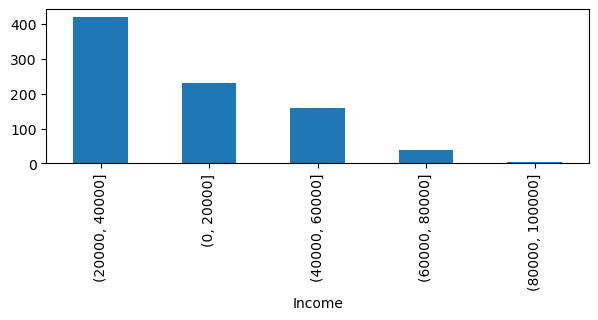

In [146]:
pd.cut(x=df['Income'], bins=[0,20_000, 40_000, 60_000, 80_000, 100_000]
      ).value_counts().plot(kind='bar',figsize=(7,2))

# Deriving New Numbers

In [184]:
import pandas as pd
import numpy as np
df=pd.read_csv("data/mortgage_applicants.csv")
df['DebtAssetRatio']=df['Debt']/df['Balance']
df.head()

,Unnamed: 0,ID,Income,Term,Balance,Debt,Score,Default,DebtAssetRatio
0,0,567,17626,10 Years,1381,293,228.0,False,0.212165
1,1,523,18959,20 Years,883,1012,187.0,False,1.146093
2,2,544,20560,10 Years,684,898,86.0,False,1.312865
3,3,370,21894,10 Years,748,85,NaN,False,0.113636
4,4,756,24430,10 Years,1224,59,504.0,False,0.048203


## Applying Functions over columns: Lambdas

In [186]:
df['Debt'].tail()

851    3880
852      32
853    3123
854    2498
855    2473
Name: Debt, dtype: int64

In [188]:
df['Debt'].map(lambda debt: 'High' if debt > 1000 else 'Low').tail()

851    High
852     Low
853    High
854    High
855    High
Name: Debt, dtype: object

In [190]:
df.select_dtypes(np.number).apply(lambda col: col.round(2))

,Unnamed: 0,ID,Income,Balance,Debt,Score,DebtAssetRatio
0,0,567,17626,1381,293,228.0,0.21
1,1,523,18959,883,1012,187.0,1.15
2,2,544,20560,684,898,86.0,1.31
3,3,370,21894,748,85,NaN,0.11
4,4,756,24430,1224,59,504.0,0.05
...,...,...,...,...,...,...,...
851,851,71,30191,1319,3880,55.0,2.94
852,852,932,41669,1385,32,780.0,0.02
853,853,39,36816,1868,3123,366.0,1.67
854,854,283,42145,1447,2498,422.0,1.73


The `select_dtypes()` method in combination with `apply()` and a lambda function is used to round all numerical columns in the DataFrame `df` to 2 decimal places.

Let's break down the code:

1. `df.select_dtypes(np.number)`: This selects only the columns in the DataFrame `df` that have numeric data types (e.g., integer or floating-point). `np.number` is a NumPy data type specifier that represents any numeric data type.

2. `.apply(lambda col: col.round(2))`: This applies a lambda function to each selected column. The lambda function takes each column (`col`) and rounds its values to 2 decimal places using the `round()` method.

Putting it all together, this code snippet rounds all numerical columns in the DataFrame `df` to 2 decimal places. It's a convenient way to ensure consistent formatting of numerical values in the DataFrame.

If a numerical column in the DataFrame has only a single decimal point of precision, applying `round(2)` will not change the display to 2 digits after the decimal point if the value doesn't require additional digits to be represented accurately.

The `round()` method in Python rounds the number to the specified number of digits after the decimal point. However, if the number already has fewer digits after the decimal point than specified, it remains unchanged.

For example:

- If a number is `12.3` and you apply `round(2)`, it remains `12.3` because it doesn't require additional digits to represent it accurately.

- If a number is `12.345` and you apply `round(2)`, it becomes `12.35` because it requires 2 digits after the decimal point to represent it accurately.

So, `round(2)` will only affect the display of numbers that have more than 2 digits after the decimal point or need rounding to 2 decimal places.

If you have any further questions or need clarification, feel free to ask!

# Working with Text data
Text data provides unique challenges and needs specific processing and preparation.
Pandas can use Pythons string methods.
Pandas also implements regular expression functions.
- These allow you to do anything with text!

In [194]:
df['Term'].str.lower().head()

0    10 years
1    20 years
2    10 years
3    10 years
4    10 years
Name: Term, dtype: object

In [196]:
df['Term'].str.find('Long').head()

0   -1
1   -1
2   -1
3   -1
4   -1
Name: Term, dtype: int64

The code `df['Term'].str.find('Long').head()` is applying the `find()` method on each element of the 'Term' column in the DataFrame `df`. This method searches for the substring 'Long' within each string in the 'Term' column and returns the index of the first occurrence of the substring. 

Here's what the return values mean:

- If the substring 'Long' is found within the string, the method returns the index of the first character of the first occurrence of 'Long'. If 'Long' is at the beginning of the string, the return value will be 0. If 'Long' is found elsewhere in the string, the return value will be the index of the first character of the substring 'Long'.

- If the substring 'Long' is not found within the string, the method returns -1.

- If the element in the 'Term' column is NaN (missing value), the method returns NaN.

For example, let's consider the following DataFrame snippet:

```
   Term
0  10 Years
1  20 Years
2  Long Term
3  Short Term
4  NaN
```

- For row 0, the substring 'Long' is not present, so the method returns -1.
- For row 1, the substring 'Long' is not present, so the method returns -1.
- For row 2, the substring 'Long' is found starting at index 0, so the method returns 0.
- For row 3, the substring 'Long' is not present, so the method returns -1.
- For row 4, the value is NaN, so the method returns NaN.

So, the return values of the `find()` method in this context provide information about the presence and location of the substring 'Long' within each string in the 'Term' column.

In [213]:
import pandas as pd
df=pd.read_csv("data/mortgage_applicants.csv")
df['Term'].str.isalpha().head()

0    False
1    False
2    False
3    False
4    False
Name: Term, dtype: bool

The `str.isalpha()` method in pandas checks if all characters in each element of a string series are alphabetic characters (letters). It returns True if all characters in the string are alphabetic and False otherwise. Here's how it works:

- If all characters in the string are alphabetic (letters), `str.isalpha()` returns True.
- If the string contains any character that is not alphabetic (e.g., numbers, symbols, whitespace), `str.isalpha()` returns False.

For example:

```python
import pandas as pd

# Sample data
data = {'text': ['hello', '123', 'abc123', 'python', 'Python3', 'data science']}

# Create a DataFrame
df = pd.DataFrame(data)

# Apply the str.isalpha() method to the 'text' column
df['is_alpha'] = df['text'].str.isalpha()

print(df)
```

Output:
```
           text  is_alpha
0         hello      True
1           123     False
2        abc123     False
3        python      True
4       Python3     False
5  data science     False
```

In this example:
- For the string 'hello', all characters are alphabetic, so `str.isalpha()` returns True.
- For the string '123', there are non-alphabetic characters (numbers), so `str.isalpha()` returns False.
- For the string 'abc123', although it contains alphabetic characters, it also contains non-alphabetic characters, so `str.isalpha()` returns False.
- Similarly, for 'Python3' and 'data science', `str.isalpha()` returns False because they contain non-alphabetic characters.

So, `str.isalpha()` is useful for checking if a string consists only of alphabetic characters, which can be handy for data validation or cleaning tasks.

## Regular Expressions (Regex)

In [217]:
df['Term'].str.findall(r'(20|10) (Years)')

0      [(10, Years)]
1      [(20, Years)]
2      [(10, Years)]
3      [(10, Years)]
4      [(10, Years)]
           ...      
851    [(20, Years)]
852    [(20, Years)]
853    [(20, Years)]
854    [(20, Years)]
855    [(20, Years)]
Name: Term, Length: 856, dtype: object

The code applies the `findall` method with a regular expression pattern `(20|10) (Years)` to each element in the 'Term' column of the DataFrame `df`. This pattern is used to extract substrings that match the specified criteria.

Here's the breakdown of the pattern:
- `(20|10)`: This part of the pattern matches either '20' or '10'.
- `(Years)`: This part of the pattern matches the substring 'Years'.

Putting it together:
- The pattern `(20|10)` matches either '20' or '10'.
- The pattern `(Years)` matches the substring 'Years'.

So, the overall pattern `(20|10) (Years)` matches substrings in the 'Term' column that contain either '20 Years' or '10 Years'.

The `findall` method searches each string in the 'Term' column for all occurrences of substrings that match the pattern and returns a list of all matches found in each string.